In [1]:
import pandas as pd

from pandas_datareader import data

ModuleNotFoundError: No module named 'pandas_datareader'

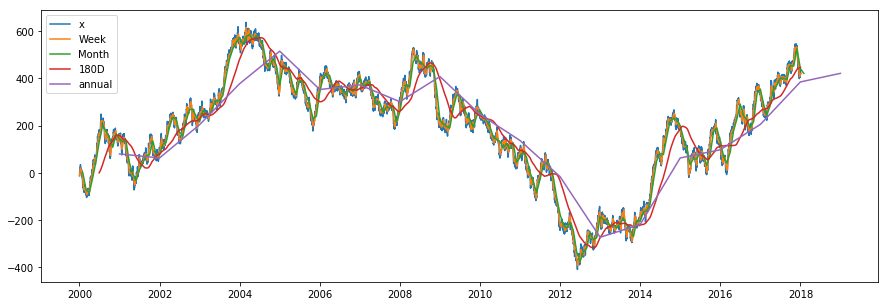

                    x   shift_-1    shift_1    shift_2
2000-01-01 -12.235593 -11.298887        NaN        NaN
2000-01-02 -11.298887  15.379539 -12.235593        NaN
2000-01-03  15.379539  19.195769 -11.298887 -12.235593
2000-01-04  19.195769  16.808412  15.379539 -11.298887
2000-01-05  16.808412  17.593410  19.195769  15.379539
2000-01-06  17.593410  17.818314  16.808412  19.195769
2000-01-07  17.818314  22.679743  17.593410  16.808412
2000-01-08  22.679743  29.726933  17.818314  17.593410
2000-01-09  29.726933  34.502865  22.679743  17.818314
2000-01-10  34.502865   6.953065  29.726933  22.679743


In [84]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

idx = pd.date_range('2000-01-01', '2018-01-01')
df = pd.DataFrame({'x':np.cumsum(np.random.normal(0, 1, len(idx))*10)}, 
                  index = idx)

plt.figure(figsize=(15, 5))
plt.plot(df.index, df['x'])
plt.plot(df.resample('W').mean(), label='Week')
plt.plot(df.resample('M').mean(), label='Month')
plt.plot(df.rolling(180).mean(), label='180D')
plt.plot(df.resample('A').mean(), label='annual')
plt.legend()
plt.savefig("../../assets/images/markdown_img/180612_1422_df_time_series.svg")
plt.show()


for shift_v in [-1, 1, 2]:
    df["shift_{}".format(shift_v)] = df['x'].shift(shift_v)
print(df.head(10))

                    x  shift_-30   shift_-1    shift_1    shift_5    shift_2
2000-01-01   0.887158 -22.406892  -7.548356        NaN        NaN        NaN
2000-01-02  -7.548356 -25.060797  -4.933386   0.887158        NaN        NaN
2000-01-03  -4.933386 -35.979398   7.086851  -7.548356        NaN   0.887158
2000-01-04   7.086851 -36.272882  19.182450  -4.933386        NaN  -7.548356
2000-01-05  19.182450 -42.381269  27.314927   7.086851        NaN  -4.933386
2000-01-06  27.314927 -51.210354  27.351867  19.182450   0.887158   7.086851
2000-01-07  27.351867 -54.751540  33.571655  27.314927  -7.548356  19.182450
2000-01-08  33.571655 -61.230177  39.308878  27.351867  -4.933386  27.314927
2000-01-09  39.308878 -58.858798  38.542712  33.571655   7.086851  27.351867
2000-01-10  38.542712 -54.928358  34.075473  39.308878  19.182450  33.571655
